In [2]:
#importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# buscamos la ruta para leer el archivo csv
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/Incidencias_proyecto/incidencias-en-carreteras-2010-2024-combined.csv')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df.info()

In [1]:
df.isnull().sum()


NameError: name 'df' is not defined

In [ ]:
#eliminar nulos
df.dropna(inplace=True)

In [ ]:
#eliminar duplicados
df.drop_duplicates(inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121712 entries, 0 to 122761
Data columns (total 9 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   carretera_nombre         121712 non-null  object
 1   carretera_descripcion    121712 non-null  object
 2   tramo_nombre             121712 non-null  object
 3   tramo_descripcion        121712 non-null  object
 4   comunicacion_tipo        121712 non-null  object
 5   incidencia_fecha_inicio  121712 non-null  object
 6   incidencia_tipo          121712 non-null  object
 7   incidencia_subtipo       121712 non-null  object
 8   es_accidente             121712 non-null  object
dtypes: object(9)
memory usage: 9.3+ MB


In [ ]:
#Vamos a diferenciar los accidentes de los incidentes
df["incidencia_subtipo"].unique()

array(['Accidente', 'Obstáculo Calzada', 'Peatón', 'Barredora',
       'Vehic Detenido', 'Daños Señalización', 'Bloqueo Carril Izd',
       'Fiestas y Actos Rel.', 'Animal Muerto', 'Fax', 'Solicitud Info',
       'Firme Deslizante DL', 'Mantto. General', 'Obras Mantenimiento',
       'Incendio en Vehículo', 'Animal Suelto', 'Notificación',
       'Fallo Informático', 'Fallo Leve Sistemas', 'Desprendimientos',
       'Hundimientos Calzada', 'Daños en la Vía', 'Llamada sin Incid.',
       'Acc. con heridos', 'Daños Vallas', 'Retenciones/Atascos',
       'Accidente Grave', 'Filtraciones Agua', 'Daños Alumbrado',
       'Obras en Carretera', 'Daños Medianas', 'Inundación',
       'Puerta Abierta', 'Bloqueo Total Paso', 'Radar',
       'Llamada Poste SOS', 'Fallo Grave Sistemas', 'Fallo en drenajes',
       'Lluvia intensa', 'Bloqueo Carril Dch', 'Limpieza General',
       'Fluido eléctrico', 'Vehic. Especiales.', 'Daño Estructura Leve',
       'Visibilidad reducida', 'Hielo', 'Nieve', 'Dañ

In [ ]:
# Crear una nueva columna "accidentes" basada en si el "incidencia_subtipo" pertenece a la lista de subtipos considerados accidentes
subtipos_accidentes = [
    'Accidente',
    'Acc. con heridos',
    'Accidente Grave',
    'Acc. con Fuego',
    'Acc. con Víctimas',
    'Acc Grave MMPP',
    'Incendio en Vehículo',
    'Desprendimientos',
    'Fuego / Explosiones'
]

# Crear la nueva columna
df['accidentes'] = df['incidencia_subtipo'].apply(lambda x: 'True' if x in subtipos_accidentes else 'False')

# Mostrar las primeras filas para verificar
df[['incidencia_subtipo', 'accidentes']].head()


,incidencia_subtipo,accidentes
0,Accidente,True
1,Obstáculo Calzada,False
2,Obstáculo Calzada,False
3,Peatón,False
4,Barredora,False


In [ ]:
# cuantos accidentes tenemos entonces encontramos que tenemos 23307 accidentes
df['accidentes'].value_counts()

,count
accidentes,
False,98405
True,23307


<ipython-input-10-a8c84435a8ac>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_año.index, y=accidentes_por_año.values, palette="Blues_r")


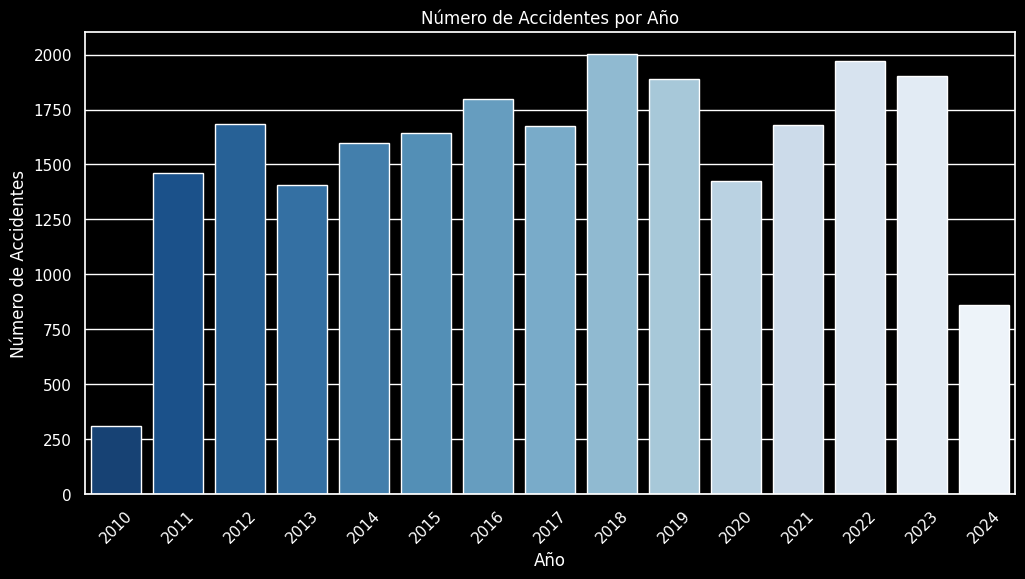

In [ ]:

# Asegurarse de que la fecha sea un objeto de tipo datetime
df['incidencia_fecha_inicio'] = pd.to_datetime(df['incidencia_fecha_inicio'])

# Extraer el año de la fecha de inicio de la incidencia
df['año'] = df['incidencia_fecha_inicio'].dt.year

# Filtrar solo los datos de accidentes
df_accidentes = df[df['accidentes'] == 'True']

# Contar el número de accidentes por año
accidentes_por_año = df_accidentes['año'].value_counts().sort_index()

# Configurar el estilo oscuro
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear la gráfica
plt.figure(figsize=(12, 6))
sns.barplot(x=accidentes_por_año.index, y=accidentes_por_año.values, palette="Blues_r")
plt.title("Número de Accidentes por Año")
plt.xlabel("Año")
plt.ylabel("Número de Accidentes")
plt.xticks(rotation=45)
plt.show()


Incremento de Accidentes en 2024: Aunque los datos para 2024 solo abarcan hasta junio, ya hay un número considerable de accidentes registrados. Si la tendencia continúa, 2024 podría superar a años anteriores en términos de número total de accidentes.

Disminución en 2010: El año 2010 muestra un número notablemente menor de accidentes en comparación con otros años. Esto podría deberse a varias razones, como cambios en las políticas de seguridad vial, menor densidad de tráfico, o simplemente una menor cantidad de datos registrados.

Fluctuaciones en Registros: Hay años intermedios que muestran una fluctuación en la cantidad de accidentes registrados, lo que podría sugerir variaciones en las condiciones de las carreteras, la efectividad de las campañas de seguridad vial, o cambios en la metodología de registro.

Importancia de la Estacionalidad: Los datos incompletos de 2024, que solo incluyen hasta junio, ya indican un alto número de accidentes, lo que sugiere que el primer semestre del año podría ser una temporada de mayor riesgo. Esto podría estar relacionado con factores estacionales como condiciones climáticas adversas o picos en el tráfico.

Tendencia General: A lo largo de los años, parece haber una tendencia general al alza en el número de accidentes, lo cual podría indicar un incremento en el tráfico vehicular, mayores reportes de incidentes, o un deterioro en las condiciones de la infraestructura vial.


In [ ]:
#quiero un grafico de mes que hya mas accidentes cada año
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121712 entries, 0 to 122761
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   carretera_nombre         121712 non-null  object        
 1   carretera_descripcion    121712 non-null  object        
 2   tramo_nombre             121712 non-null  object        
 3   tramo_descripcion        121712 non-null  object        
 4   comunicacion_tipo        121712 non-null  object        
 5   incidencia_fecha_inicio  121712 non-null  datetime64[ns]
 6   incidencia_tipo          121712 non-null  object        
 7   incidencia_subtipo       121712 non-null  object        
 8   es_accidente             121712 non-null  object        
 9   accidentes               121712 non-null  object        
 10  año                      121712 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 10.7+ MB


In [ ]:

# Assuming df_accidentes is your DataFrame and 'incidencia_fecha_inicio' is a column containing dates
df_accidentes['mes'] = pd.to_datetime(df_accidentes['incidencia_fecha_inicio']).dt.month

<ipython-input-12-f336688b33fd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accidentes['mes'] = pd.to_datetime(df_accidentes['incidencia_fecha_inicio']).dt.month


In [ ]:
# Crear un DataFrame para la correlación entre mes y accidentes
# Primero, vamos a contar el número de accidentes por mes sin distinguir años
accidentes_por_mes = df_accidentes['mes'].value_counts().sort_index()

# Crear un DataFrame con los datos
correlacion_df = pd.DataFrame({
    'mes': accidentes_por_mes.index,
    'accidentes': accidentes_por_mes.values
})

# Calcular la correlación
correlacion = correlacion_df.corr()

# Mostrar la correlación
correlacion


,mes,accidentes
mes,1.00000,0.20306
accidentes,0.20306,1.00000


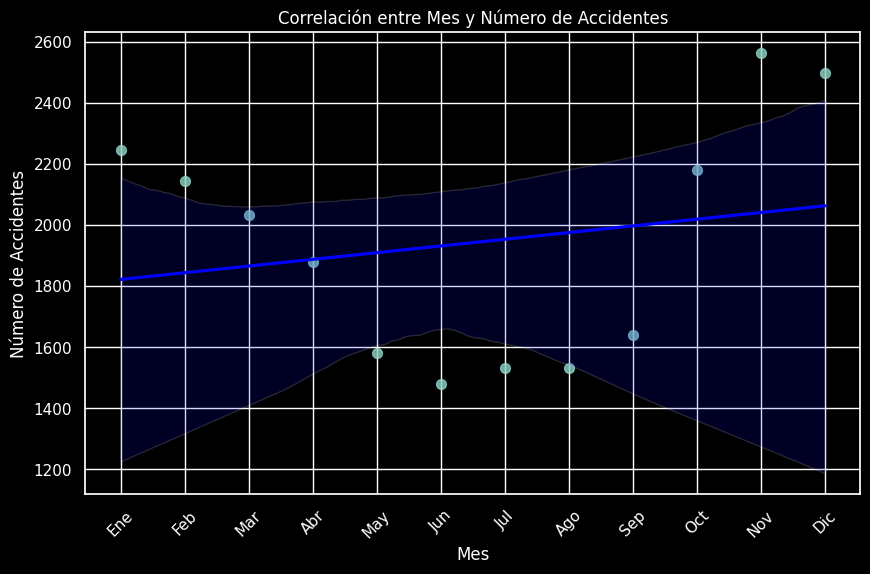

In [ ]:
# Crear un gráfico de dispersión para visualizar la correlación entre el mes y el número de accidentes
plt.figure(figsize=(10, 6))
sns.regplot(x='mes', y='accidentes', data=correlacion_df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Correlación entre Mes y Número de Accidentes')
plt.xlabel('Mes')
plt.ylabel('Número de Accidentes')

# Define meses_nombres with month abbreviations
meses_nombres = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

plt.xticks(ticks=correlacion_df['mes'], labels=meses_nombres, rotation=45)
plt.grid(True)
plt.show()

Meses con Más Accidentes:

Diciembre: Con 2506 accidentes, diciembre es el mes con la mayor cantidad de accidentes, significativamente por encima de la media mensual de 1947 accidentes. Este pico podría estar relacionado con factores como el aumento del tráfico debido a las festividades, condiciones climáticas más adversas, o un mayor número de desplazamientos.

Noviembre: También es un mes con un número elevado de accidentes, aunque no tan alto como diciembre. Las condiciones similares de fin de año podrían influir en este comportamiento.
Meses con Menos Accidentes:

Junio: Este mes tiene alrededor de 1400 accidentes, lo que está por debajo de la media mensual. Las condiciones climáticas más favorables y una posible disminución en la cantidad de tráfico (debido a vacaciones escolares o menos desplazamientos laborales) podrían contribuir a esta reducción.

Agosto: Similar a junio, agosto también tiende a tener menos accidentes, probablemente debido a patrones de tráfico diferentes durante el verano, cuando muchas personas están de vacaciones.

Conclusión: Hay una clara estacionalidad en los accidentes, con un aumento significativo en los meses de invierno, particularmente en diciembre, y una reducción en los meses de verano.


<ipython-input-15-2ac5b6774d13>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='año', y='num_accidentes', data=accidentes_por_año, palette='viridis')


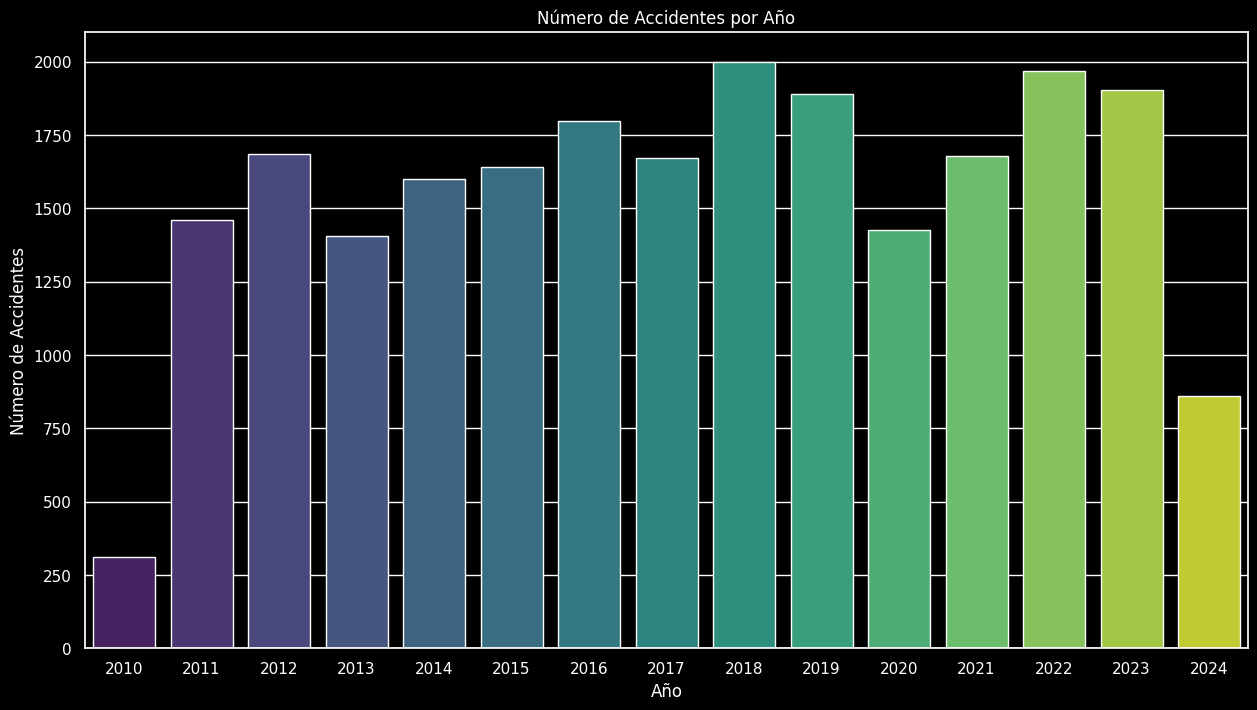

In [ ]:
# Agrupar por año y contar el número de accidentes
accidentes_por_año = df_accidentes.groupby('año')['accidentes'].count().reset_index(name='num_accidentes')

# Configurar el estilo oscuro
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear la gráfica
plt.figure(figsize=(15, 8))
sns.barplot(x='año', y='num_accidentes', data=accidentes_por_año, palette='viridis')
plt.title("Número de Accidentes por Año")
plt.xlabel("Año")
plt.ylabel("Número de Accidentes")
plt.show()

<ipython-input-16-d014944f38cf>:9: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=accidentes_por_año.index, y=accidentes_por_año.values, marker='o', palette="Blues_r")


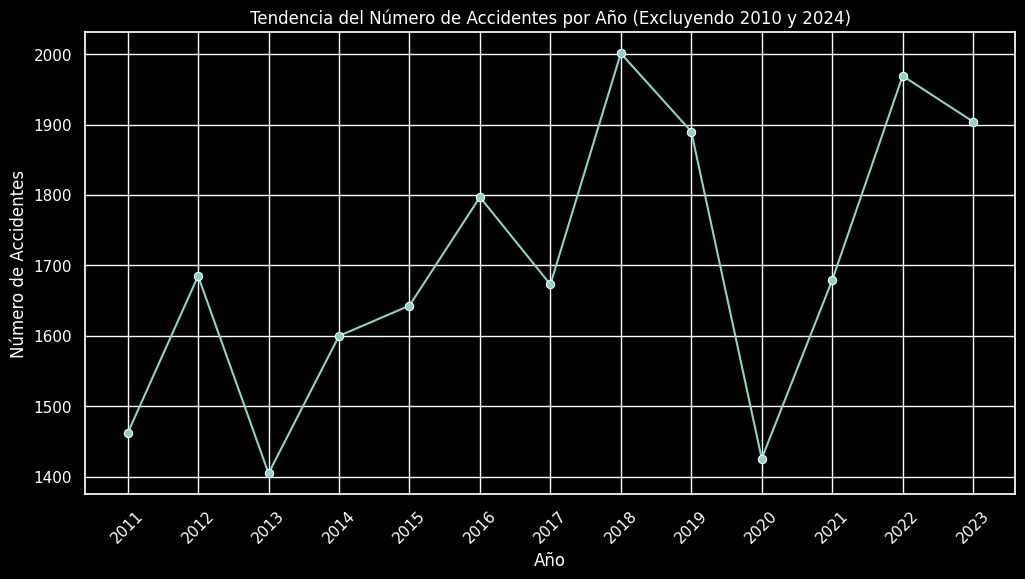

In [ ]:
# Recalculando los datos de accidentes filtrados y excluyendo 2010 y 2024
df_accidentes_filtrados = df_accidentes[(df_accidentes['año'] != 2010) & (df_accidentes['año'] != 2024)]

# Contar el número de accidentes por año
accidentes_por_año = df_accidentes_filtrados.groupby('año').size()

# Graficar la tendencia del número de accidentes por año
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidentes_por_año.index, y=accidentes_por_año.values, marker='o', palette="Blues_r")
plt.title("Tendencia del Número de Accidentes por Año (Excluyendo 2010 y 2024)")
plt.xlabel("Año")
plt.ylabel("Número de Accidentes")
plt.xticks(ticks=accidentes_por_año.index, rotation=45)
plt.grid(True)
plt.show()


insights clave basados en la tendencia del número de accidentes por año, excluyendo los años 2010 y 2024:

Tendencia General al Alza:

A lo largo de los años, hay una tendencia general al aumento en el número de accidentes. Esto podría ser indicativo de un incremento en el tráfico vehicular, un mayor número de reportes de incidentes, o incluso cambios en la infraestructura vial que podrían haber influido en el riesgo de accidentes.
Pico de Accidentes:

En años como 2018 y 2019, se observa un aumento notable en el número de accidentes.

El año 2020 muestra una caída significativa en el número de accidentes, lo cual es claramente atribuible a la pandemia de COVID-19. Durante este año, hubo restricciones de movilidad, cuarentenas, y una reducción considerable en el tráfico, lo que llevó a una disminución en el número de accidentes reportados.


Después de 2020, se puede observar una recuperación en el número de accidentes en 2021 y 2022. A medida que se levantaron las restricciones y se reanudaron las actividades normales, el tráfico volvió a niveles anteriores, lo que resultó en un incremento en los accidentes.

Conclusión: La gráfica sugiere que el número de accidentes ha estado en una tendencia al alza en la última década, con una interrupción notable en 2020 debido a la pandemia. Sin embargo, la rápida recuperación en los años posteriores indica que los patrones de tráfico y los factores que influencian los accidentes volvieron a su curso normal una vez que las restricciones se levantaron. Estos patrones son cruciales para entender cómo se podrían diseñar políticas y medidas de seguridad vial para mitigar los riesgos en el futuro.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121712 entries, 0 to 122761
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   carretera_nombre         121712 non-null  object        
 1   carretera_descripcion    121712 non-null  object        
 2   tramo_nombre             121712 non-null  object        
 3   tramo_descripcion        121712 non-null  object        
 4   comunicacion_tipo        121712 non-null  object        
 5   incidencia_fecha_inicio  121712 non-null  datetime64[ns]
 6   incidencia_tipo          121712 non-null  object        
 7   incidencia_subtipo       121712 non-null  object        
 8   es_accidente             121712 non-null  object        
 9   accidentes               121712 non-null  object        
 10  año                      121712 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 10.7+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121712 entries, 0 to 122761
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   carretera_nombre         121712 non-null  object        
 1   carretera_descripcion    121712 non-null  object        
 2   tramo_nombre             121712 non-null  object        
 3   tramo_descripcion        121712 non-null  object        
 4   comunicacion_tipo        121712 non-null  object        
 5   incidencia_fecha_inicio  121712 non-null  datetime64[ns]
 6   incidencia_tipo          121712 non-null  object        
 7   incidencia_subtipo       121712 non-null  object        
 8   es_accidente             121712 non-null  object        
 9   accidentes               121712 non-null  object        
 10  año                      121712 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 10.7+ MB


In [ ]:
# Lista de variables que quieres incluir en la columna 'nombre_accidentes'
accidentes_list = [
    'Accidente',
    'Acc. con heridos',
    'Accidente Grave',
    'Acc. con Fuego',
    'Acc. con Víctimas',
    'Acc Grave MMPP',
    'Incendio en Vehículo',
    'Desprendimientos',
    'Fuego / Explosiones'
]

# Crear la nueva columna 'nombre_accidentes'
df['nombre_accidentes'] = df['incidencia_subtipo'].apply(lambda x: x if x in accidentes_list else "incidente")
# Filtrar para solo tener accidentes en la columna
df_accidentes = df[df['nombre_accidentes'] != "incidente"]

# Ver los valores únicos en la columna filtrada
accidentes_unicos = df_accidentes['nombre_accidentes'].unique()
# Mostrar los valores únicos
print(accidentes_unicos)

['Accidente' 'Incendio en Vehículo' 'Desprendimientos' 'Acc. con heridos'
 'Accidente Grave' 'Acc. con Fuego' 'Fuego / Explosiones' 'Acc Grave MMPP'
 'Acc. con Víctimas']


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121712 entries, 0 to 122761
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   carretera_nombre         121712 non-null  object        
 1   carretera_descripcion    121712 non-null  object        
 2   tramo_nombre             121712 non-null  object        
 3   tramo_descripcion        121712 non-null  object        
 4   comunicacion_tipo        121712 non-null  object        
 5   incidencia_fecha_inicio  121712 non-null  datetime64[ns]
 6   incidencia_tipo          121712 non-null  object        
 7   incidencia_subtipo       121712 non-null  object        
 8   es_accidente             121712 non-null  object        
 9   accidentes               121712 non-null  object        
 10  año                      121712 non-null  int32         
 11  nombre_accidentes        121712 non-null  object        
dtypes: datetime64[ns](1),

<ipython-input-21-4cc295498bcd>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=porcentaje_accidentes.index, y=porcentaje_accidentes.values, palette="Blues_r")


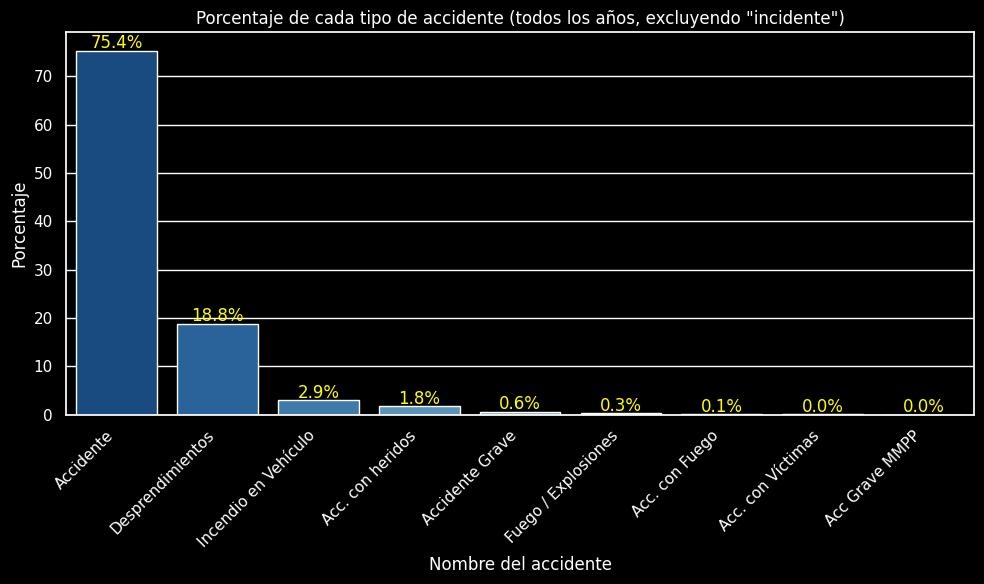

In [ ]:
# Calcular el porcentaje de cada tipo de accidente
porcentaje_accidentes = df_accidentes['nombre_accidentes'].value_counts(normalize=True) * 100

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
sns.set(style="darkgrid")
plt.style.use("dark_background")

ax = sns.barplot(x=porcentaje_accidentes.index, y=porcentaje_accidentes.values, palette="Blues_r")
plt.title('Porcentaje de cada tipo de accidente (todos los años, excluyendo "incidente")')
plt.xlabel('Nombre del accidente')
plt.ylabel('Porcentaje')
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas de porcentaje encima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.5,
            f'{height:.1f}%', ha="center", color='yellow')

plt.tight_layout()
plt.show()

<ipython-input-22-47dfb9cf7b0f>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_carretera.values, y=accidentes_por_carretera.index, palette="Blues_r")


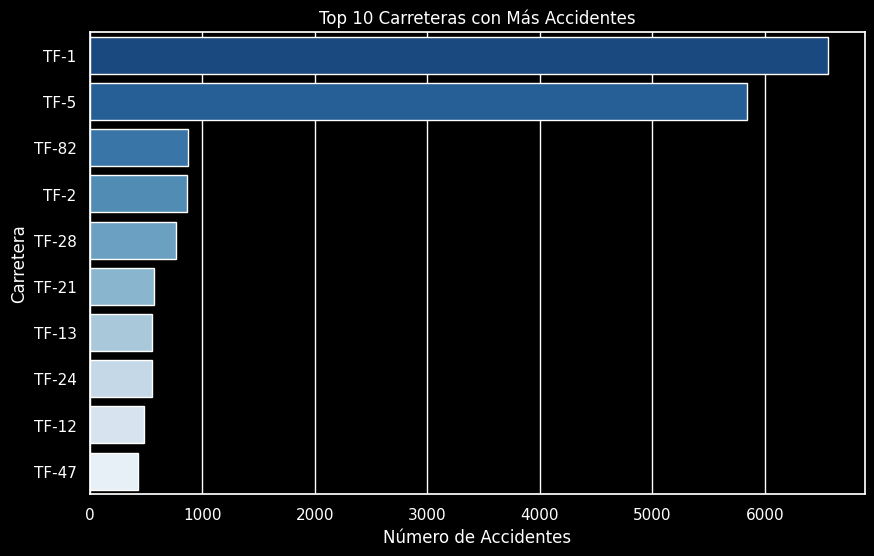

In [ ]:
# Filtrar los datos para solo incluir accidentes
accidentes_df = df[df['es_accidente'] == 'Accidente']

# Contar la cantidad de accidentes por carretera
accidentes_por_carretera = accidentes_df['carretera_nombre'].value_counts().head(10)



sns.set(style="darkgrid")
plt.style.use("dark_background")

plt.figure(figsize=(10, 6))
sns.barplot(x=accidentes_por_carretera.values, y=accidentes_por_carretera.index, palette="Blues_r")
plt.title("Top 10 Carreteras con Más Accidentes")
plt.xlabel("Número de Accidentes")
plt.ylabel("Carretera")

plt.show()



Las carreteras TF-1 y TF-5 son las que registran la mayor cantidad de accidentes. Este hecho se debe principalmente a la alta afluencia de tráfico que experimentan y a su considerable longitud, lo que incrementa la probabilidad de incidentes.


<ipython-input-23-fa90134363ab>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accidentes_por_tramo.values, y=accidentes_por_tramo.index, palette="Blues_r")


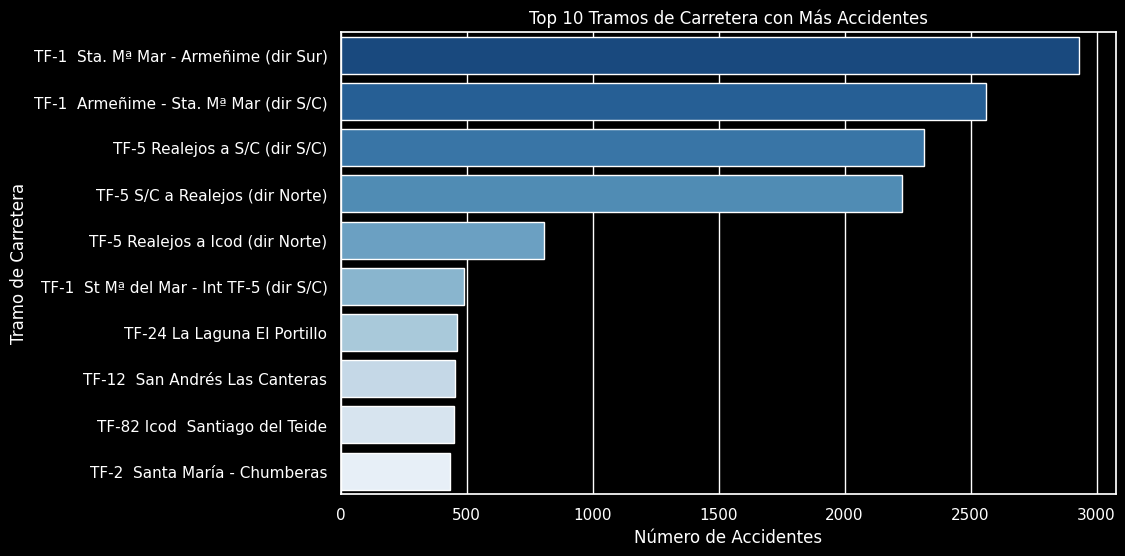

In [ ]:
 # Contar la cantidad de accidentes por tramo de carretera
accidentes_por_tramo = accidentes_df['tramo_nombre'].value_counts().head(10)

# Generar gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=accidentes_por_tramo.values, y=accidentes_por_tramo.index, palette="Blues_r")
plt.title("Top 10 Tramos de Carretera con Más Accidentes")
plt.xlabel("Número de Accidentes")
plt.ylabel("Tramo de Carretera")

plt.show()


<ipython-input-24-44c92e691a9e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes_df['incidencia_fecha_inicio'] = pd.to_datetime(accidentes_df['incidencia_fecha_inicio'])
<ipython-input-24-44c92e691a9e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accidentes_df['hora'] = accidentes_df['incidencia_fecha_inicio'].dt.hour


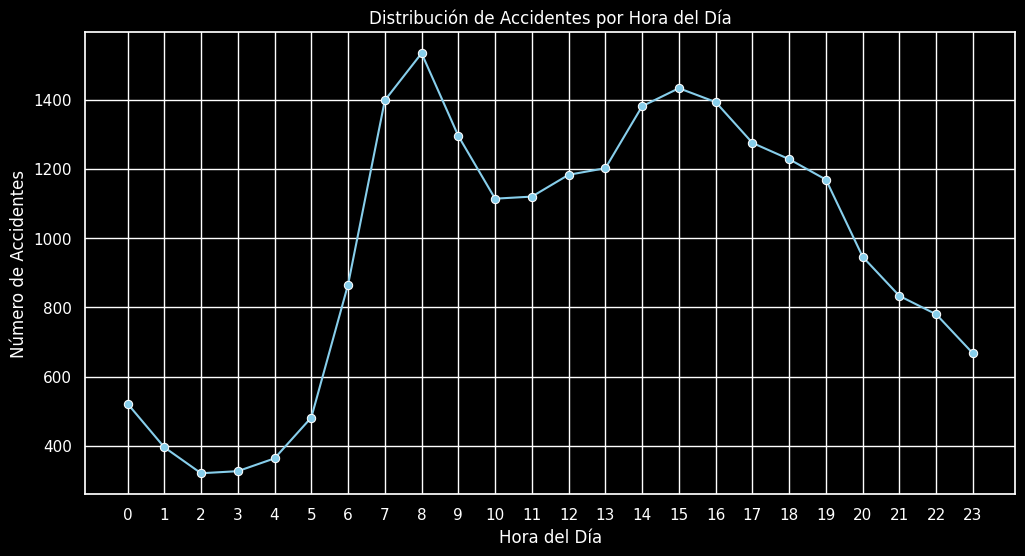

In [ ]:
# Convertir la columna de fecha y hora a formato datetime para extraer la hora
accidentes_df['incidencia_fecha_inicio'] = pd.to_datetime(accidentes_df['incidencia_fecha_inicio'])

# Extraer la hora del día
accidentes_df['hora'] = accidentes_df['incidencia_fecha_inicio'].dt.hour

# Contar el número de accidentes por hora
accidentes_por_hora = accidentes_df['hora'].value_counts().sort_index()

# Generar gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=accidentes_por_hora.index, y=accidentes_por_hora.values, marker='o', color="skyblue")
plt.title("Distribución de Accidentes por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Accidentes")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()



El gráfico muestra que los accidentes tienen una distribución variable a lo largo del día, con un claro aumento en ciertas horas. Se observa que las horas con mayor número de accidentes ocurren durante las primeras horas de la mañana y al final de la tarde, lo cual coincide con los períodos típicos de mayor tráfico debido a los desplazamientos hacia y desde el trabajo (las horas pico).


<ipython-input-25-21ed9b8092e7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=incidentes_por_tipo.values, y=incidentes_por_tipo.index, palette="Blues_r")


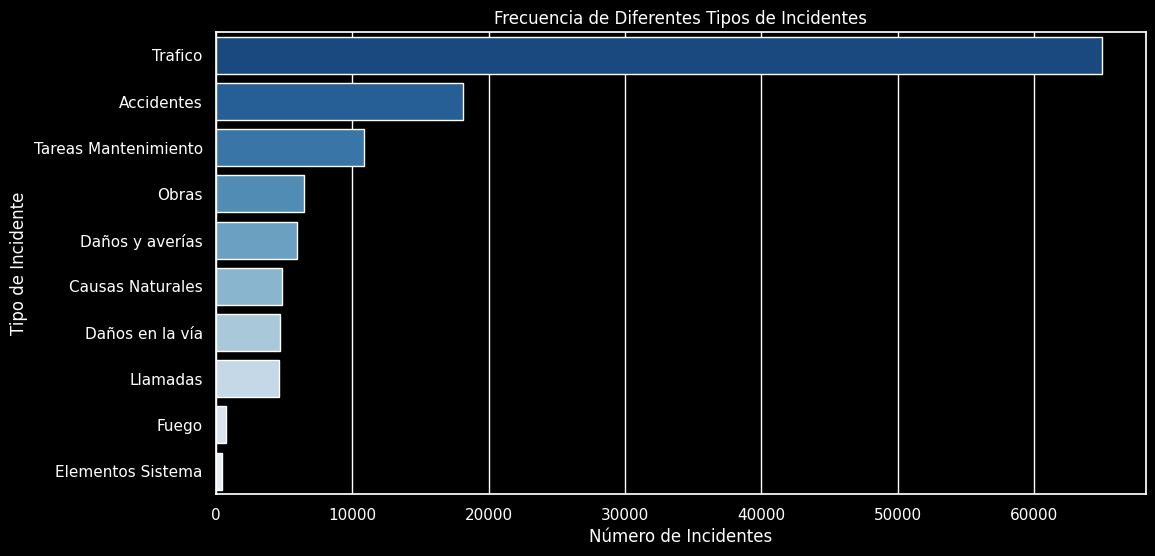

In [ ]:
# Contar la cantidad de cada tipo de incidente
incidentes_por_tipo = df['incidencia_tipo'].value_counts()

# Generar gráfico
plt.figure(figsize=(12, 6))
sns.barplot(x=incidentes_por_tipo.values, y=incidentes_por_tipo.index, palette="Blues_r")
plt.title("Frecuencia de Diferentes Tipos de Incidentes")
plt.xlabel("Número de Incidentes")
plt.ylabel("Tipo de Incidente")

plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121712 entries, 0 to 122761
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   carretera_nombre         121712 non-null  object        
 1   carretera_descripcion    121712 non-null  object        
 2   tramo_nombre             121712 non-null  object        
 3   tramo_descripcion        121712 non-null  object        
 4   comunicacion_tipo        121712 non-null  object        
 5   incidencia_fecha_inicio  121712 non-null  datetime64[ns]
 6   incidencia_tipo          121712 non-null  object        
 7   incidencia_subtipo       121712 non-null  object        
 8   es_accidente             121712 non-null  object        
 9   accidentes               121712 non-null  object        
 10  año                      121712 non-null  int32         
 11  nombre_accidentes        121712 non-null  object        
dtypes: datetime64[ns](1),

In [ ]:
df["nombre_accidentes"].unique()




array(['Accidente', 'incidente', 'Incendio en Vehículo',
       'Desprendimientos', 'Acc. con heridos', 'Accidente Grave',
       'Acc. con Fuego', 'Fuego / Explosiones', 'Acc Grave MMPP',
       'Acc. con Víctimas'], dtype=object)

In [ ]:
df.head()

,carretera_nombre,carretera_descripcion,tramo_nombre,tramo_descripcion,comunicacion_tipo,incidencia_fecha_inicio,incidencia_tipo,incidencia_subtipo,es_accidente,accidentes,año,nombre_accidentes
0,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2015-01-02 19:31:00,Accidentes,Accidente,Accidente,True,2015,Accidente
1,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2015-01-12 13:35:00,Trafico,Obstáculo Calzada,No Accidente,False,2015,incidente
2,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2015-01-12 17:44:00,Trafico,Obstáculo Calzada,No Accidente,False,2015,incidente
3,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2015-01-13 16:25:00,Trafico,Peatón,No Accidente,False,2015,incidente
4,TF-1,AUTOPISTA DE SANTA CRUZ A ARMEÑIME,TF-1 Int TF-5 - St Mª del Mar (dir Sur),TF-1 / Autopista del Sur Santa Cruz a Armeñime...,Llamada,2015-01-14 23:08:00,Tareas Mantenimiento,Barredora,No Accidente,False,2015,incidente


In [ ]:
df["incidencia_tipo"].unique()

array(['Accidentes', 'Trafico', 'Tareas Mantenimiento', 'Daños en la vía',
       'Llamadas', 'Obras', 'Fuego', 'Daños y averías',
       'Causas Naturales', 'Elementos Sistema'], dtype=object)

<ipython-input-31-01f1635f5e20>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=trafico_por_ano.index, y=trafico_por_ano.values, palette="Blues_r")


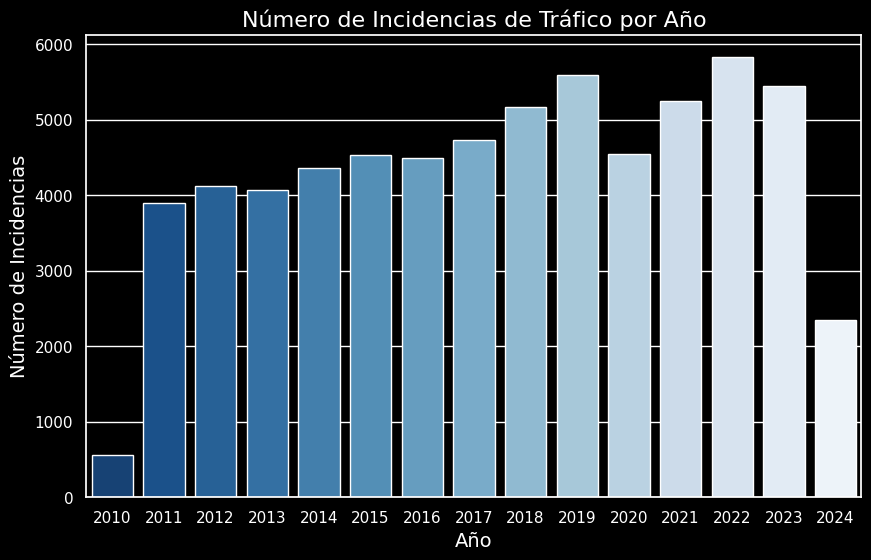

In [ ]:

# Filtrar datos donde el tipo de incidencia sea "Trafico"
trafico_data = df[df['incidencia_tipo'] == 'Trafico']

# Contar el número de incidencias de tráfico por año
trafico_por_ano = trafico_data['año'].value_counts().sort_index()

# Configurar estilo oscuro
sns.set(style="darkgrid")
plt.style.use("dark_background")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=trafico_por_ano.index, y=trafico_por_ano.values, palette="Blues_r")

# Configurar el título y las etiquetas
plt.title("Número de Incidencias de Tráfico por Año", fontsize=16)
plt.xlabel("Año", fontsize=14)
plt.ylabel("Número de Incidencias", fontsize=14)

# Mostrar el gráfico
plt.show()


In [ ]:
#Trafico por meses